In [4]:
import glob as glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.offsetbox import AnchoredText

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
CMAP = plt.cm.plasma
CMAP_R = plt.cm.plasma_r
COLORS = [CMAP(i / 4.0) for i in range(5)]

In [7]:
COLOR_0 = COLORS[0]
COLOR_1 = COLORS[1]
COLOR_2 = COLORS[2]
COLOR_3 = COLORS[3]

In [8]:
TEXTWIDTH = 3.25063
FONTSIZE = 6

In [9]:
def setup():
    matplotlib.rcParams.update({"font.size": FONTSIZE})  # controls default text sizes
    matplotlib.rcParams.update({"axes.titlesize": FONTSIZE})  # fontsize of the axes title
    matplotlib.rcParams.update({"axes.labelsize": FONTSIZE})  # fontsize of the x and y labels
    matplotlib.rcParams.update({"axes.formatter.use_mathtext": True})  # use scientific notation for axes with pretty formatting
    matplotlib.rcParams.update({"axes.formatter.useoffset": True}) #
    matplotlib.rcParams.update({"axes.formatter.limits": [0, 0]})  
    matplotlib.rcParams.update({"xtick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"ytick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"legend.fontsize": FONTSIZE})  # legend fontsize
    matplotlib.rcParams.update({"figure.titlesize": FONTSIZE})  # fontsize of the figure title
    matplotlib.rcParams.update({"figure.dpi": 300})
    matplotlib.rcParams.update({"savefig.dpi": 300})

In [10]:
setup()

In [11]:
def load_precisions(filenames):
    filenames = sorted(filenames)
    scaler = MinMaxScaler()
    precisions = []
    unscaled_prec = [np.loadtxt(file) for file in filenames]
    for i in range(len(unscaled_prec)):
        prec = np.abs(unscaled_prec[i])
        prec = scaler.fit_transform(prec.reshape(-1,1)).ravel()
        precisions.append(prec)
    return precisions
    

In [12]:
def load_precisions_ard(filenames):
    filenames = sorted(filenames)
    scaler = MinMaxScaler()
    precisions = []
    unscaled_prec = [np.loadtxt(file) for file in filenames]
    for i in range(len(unscaled_prec)):
        prec = 1/np.abs(unscaled_prec[i])
        prec = scaler.fit_transform(prec.reshape(-1,1)).ravel()
        precisions.append(prec)
    return precisions
    

# Compact

In [13]:
ard_precisions = load_precisions_ard(glob.glob("../compact/results/ard_precisions*.txt"))
rff_precisions = load_precisions(glob.glob("../compact/results/rffnet_precisions*.txt"))
srff_precisions = load_precisions(glob.glob("../compact/results/srff_precisions*.txt"))
xgb_precisions = load_precisions(glob.glob("../compact/results/xgb_precisions*.txt"))

In [14]:
ard_precisions[0].shape

(21,)

In [15]:
x = np.arange(1, 22)
x_labels = [1,5,10,15,20]

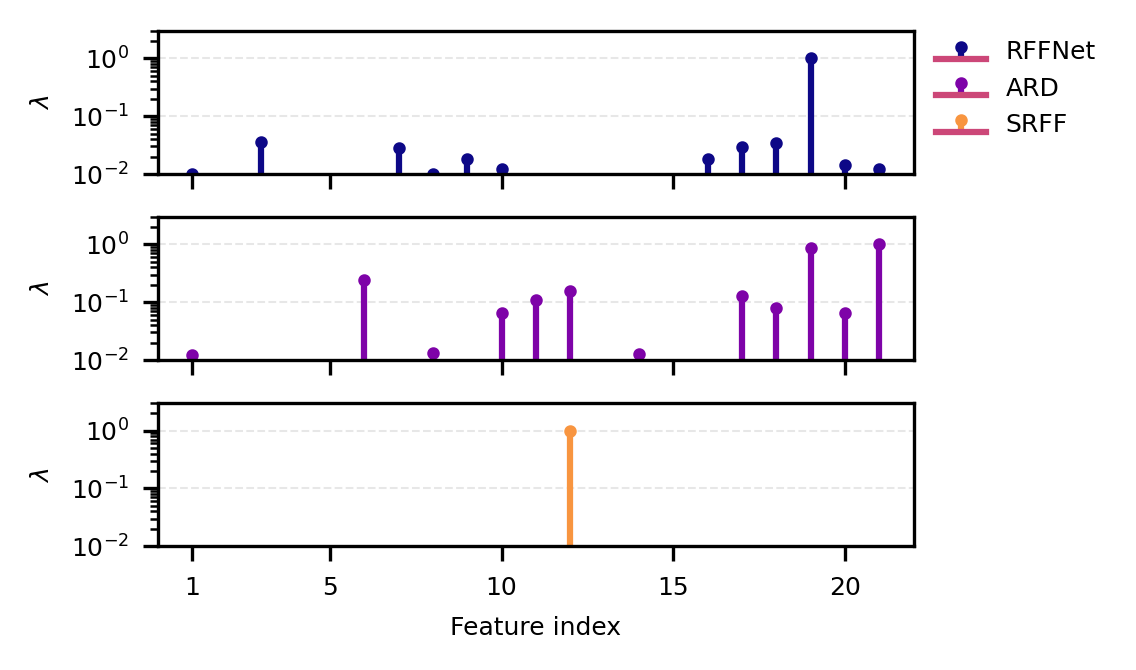

In [16]:
fig, (ax1, ax3, ax4) = plt.subplots(3,1, sharex=True, sharey=True,
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0], label="RFFNet")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.set_yscale("log")
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()


# conf = ax2.stem(x, xgb_precisions[0], label="XGB")
# ax2.set_ylabel(r"$\lambda$")
# plt.setp(conf[0], ms=2, color=COLOR_1)
# plt.setp(conf[1], color=COLOR_1)
# plt.setp(conf[2], color='w')
# ax2.set_ylim(1e-4, 3.0)
# ax2.set_yscale("log")

conf = ax3.stem(x, ard_precisions[0], label="ARD")
ax3.set_ylabel(r"$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_1)
plt.setp(conf[1], color=COLOR_1)
plt.setp(conf[2], color=COLOR_2)
ax3.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax3.xaxis.grid()



conf = ax4.stem(x, srff_precisions[0], label="SRFF")
ax4.set_ylabel(r"$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_3)
plt.setp(conf[1], color=COLOR_3)
plt.setp(conf[2], color=COLOR_2)
ax4.set_xlabel("Feature index")
ax4.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax4.xaxis.grid()


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(1.11, 0.9), frameon=False )

plt.xticks(x_labels, x_labels)
plt.ylim(1e-2, 3)
plt.savefig("../../figures/compact/relevances.pdf", bbox_inches="tight")
plt.show()